In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.linalg import svd, eig
import matplotlib.animation as animation

# Load data
mat = loadmat(r"c:\Users\HP\Downloads\spiralwaves.mat")
U_data = mat["u"]
V_data = mat["v"]
x_vals, y_vals, time_vals = mat["x"].squeeze(), mat["y"].squeeze(), mat["t"].squeeze()
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)

grid_size = U_data.shape[0]
total_points = grid_size ** 2
num_snapshots = U_data.shape[2]

# Flatten each frame to 2D
U_flat = U_data.reshape(total_points, num_snapshots)
V_flat = V_data.reshape(total_points, num_snapshots)


In [2]:

# Create snapshot matrices
U1 = U_flat[:, :-1]
U2 = U_flat[:, 1:]

# Linear mapping approximation (A)
A_est = U2 @ np.linalg.pinv(U1)

# Truncated SVD
U_basis, Sigma, Vh = svd(U1, full_matrices=False)
rank = 50
Ub = U_basis[:, :rank]
Sb = np.diag(Sigma[:rank])
Vb = Vh[:rank, :]

# Projected system
A_proj = Ub.T @ U2 @ Vb.T @ np.linalg.inv(Sb)

# Eigenvalues and modes
evals_full, _ = eig(A_est)
evals_proj, eigvecs_proj = eig(A_proj)
DMD_modes = U2 @ Vb.T @ np.linalg.inv(Sb) @ eigvecs_proj


Full Operator Eigenvalues: Inside = 4090, On = 22, Outside = 6


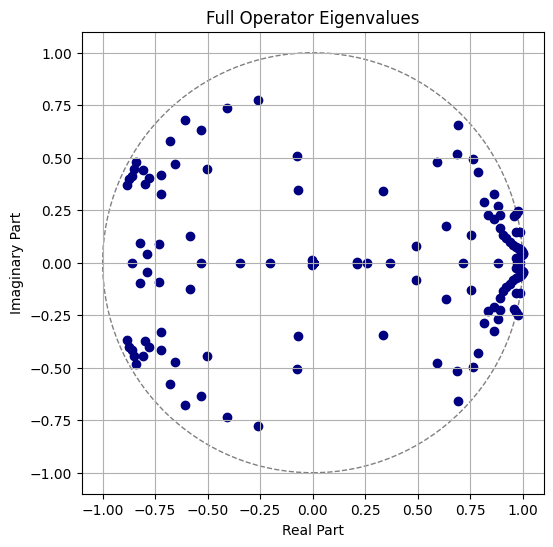

Reduced Operator Eigenvalues: Inside = 48, On = 14, Outside = 2


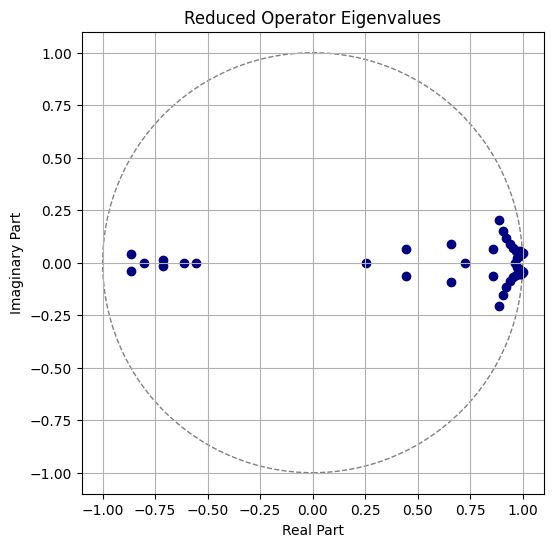

In [5]:

def show_spectrum(eigenvalues, title):
    fig, axis = plt.subplots(figsize=(6, 6))
    axis.add_patch(plt.Circle((0, 0), radius=1, color='gray', fill=False, linestyle='--'))
    axis.scatter(eigenvalues.real, eigenvalues.imag, c='navy')
    axis.set_aspect('equal')
    axis.set_xlabel("Real Part")
    axis.set_ylabel("Imaginary Part")
    axis.set_title(title)
    axis.grid(True)

    # Count locations
    magnitudes = np.abs(eigenvalues)
    inside = np.sum(magnitudes < 1)
    on_circle = np.sum(np.isclose(magnitudes, 1, atol=1e-2))
    outside = np.sum(magnitudes > 1)
    print(f"{title}: Inside = {inside}, On = {on_circle}, Outside = {outside}")
    plt.show()

# Plotting
show_spectrum(evals_full, "Full Operator Eigenvalues")
show_spectrum(evals_proj, "Reduced Operator Eigenvalues")


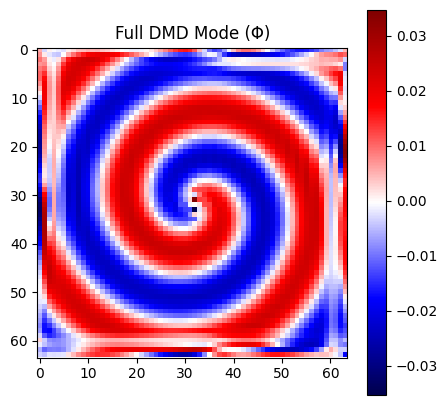

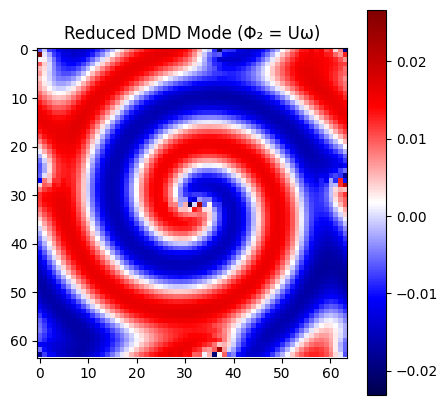

In [6]:

def plot_mode(mode, title, idx=0):
    mode_reshaped = mode[:, idx].real.reshape(grid_size, grid_size)
    plt.figure(figsize=(5,5))
    plt.imshow(mode_reshaped, cmap='seismic')
    plt.colorbar()
    plt.title(title)
    plt.show()

# Compare first mode
plot_mode(DMD_modes_full, "Full DMD Mode (Φ)", idx=0)
plot_mode(Phi2, "Reduced DMD Mode (Φ₂ = Uω)", idx=0)